In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline


In [ ]:
df = pd.read_csv('/content/beer_reviews.csv')
df = df.dropna()
print(df.shape)

(1518478, 13)


The code below drops three columns that are review time, brewery id, and beer id. All three of those columns are not needed for our analysis.

In [ ]:
df = df.drop(['review_time', 'brewery_id', 'beer_beerid'], axis=1)
df.shape

(1518478, 10)

The code below generates a histogram to display the spread of all six variables included in the data set 

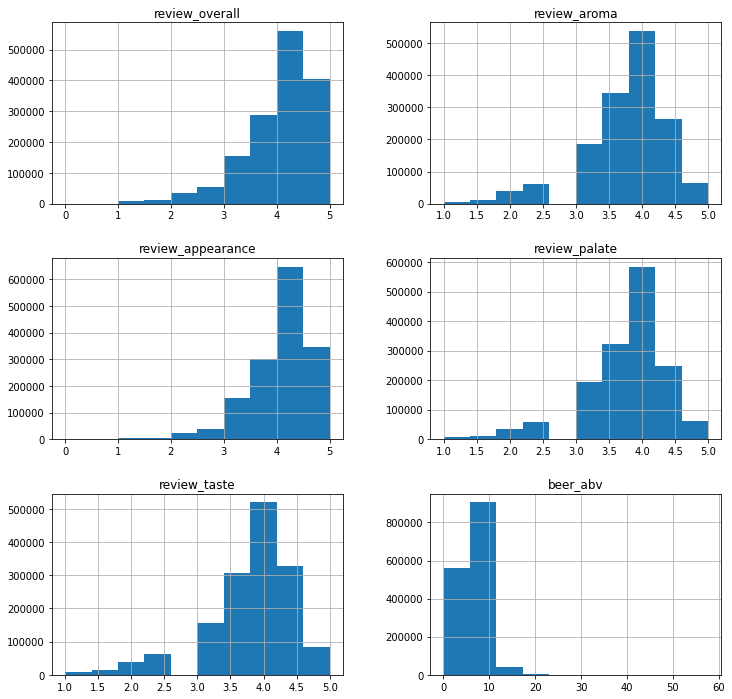

In [ ]:
df.hist(figsize=(12,12))
plt.show()

#Analysis of the Histogram showing all reviews in the dataset above:
review_overall - left skewed, and most beers are rated between 4 and 5

review_aroma  - the spread of the data is normal, and centered at a rating of 4

review_appearance	- left skewed, and most beers appearences are rated between 4 and 5

review_palate	- the spread of the data is normal, and centered at a rating of 4

review_taste - 	the spread of the data is normal, and centered at a rating of 4

beer_abv	- right skewed and a large majority of the beers present in the data set have an abv below 10 percent



The code below creates a new dataframe called df_beers. It first takes all unique beer names, and then takes the average of all of the unique beer name reviews and uses that to fill in the columns. Df_beers_1000 is the top 1000 rated beers based of their average review from the data set.



In [ ]:
df_beers = df.groupby("beer_name").mean().reset_index()
df_beers_1000 = df_beers.nlargest(1000, 'review_overall')

In [ ]:
df_beers_1000.shape

(1000, 7)

The code below generates six histograms to represent the spread of the averages of the six variables for the 1000 highest rated beers on average

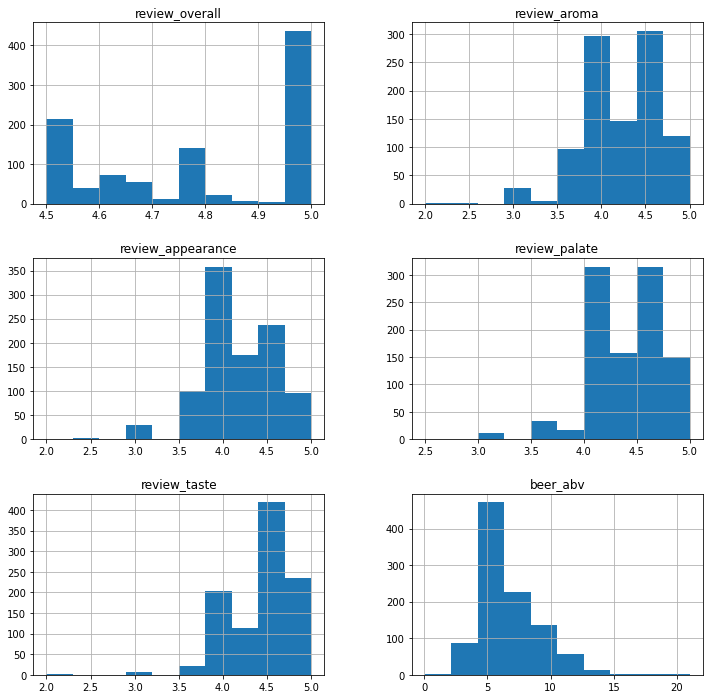

In [ ]:
df_beers_1000.hist(figsize=(12,12), label = 'aaa')
plt.show()

In [ ]:
df_beerType = df.groupby('beer_style').mean().reset_index()

In [ ]:
df_beerType['beer_label'] = ['good' if x >=3.75 else 'bad' for x in df_beerType['review_overall']]

In [ ]:
df_beerType['beer_label'].value_counts()

good    68
bad     36
Name: beer_label, dtype: int64

In [ ]:
y = df_beerType['beer_label']
X = df_beerType[['review_appearance','review_palate','review_taste', 'beer_abv']]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(Xtrain, ytrain)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

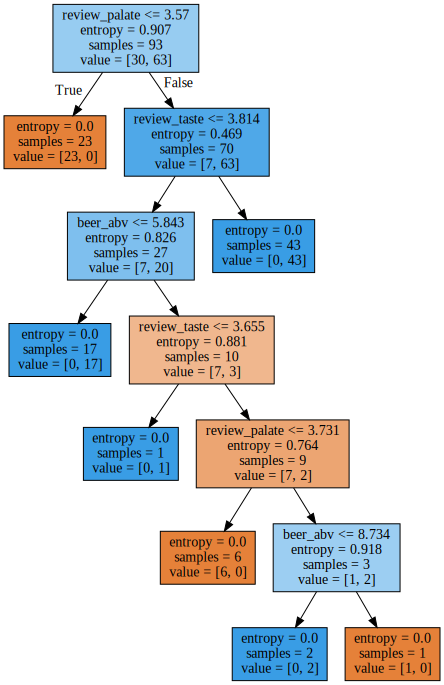

In [ ]:
vis_data = export_graphviz(clf, out_file=None,
                feature_names=Xtrain.columns,
                filled=True)

graph = graphviz.Source(vis_data) 
graph

In [ ]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Training accuracy: 1.0
Testing accuracy: 0.9090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


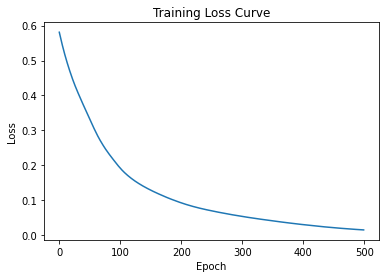

In [ ]:
mlp=MLPClassifier(
        hidden_layer_sizes=(18, 18, 18),
        solver='adam',
        learning_rate_init=0.001,
        warm_start=True,
        activation="relu",
        max_iter=500,
        tol=1e-5,
        n_iter_no_change=50,
        early_stopping=False)
mlp.fit(Xtrain,ytrain)

print('Training accuracy:', mlp.score(Xtrain,ytrain))
print('Testing accuracy:', mlp.score(Xtest,ytest))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss');

###Regression

First we started by creating a new data frame that grouped every beer style together. After grouping the Beer styles together we took the average for all numerical data and reset the index of our data frame so that it was in alphabetical order based on beer style.

In [ ]:
df_beer_style = df.groupby("beer_style").mean().reset_index()


We are trying to run regression to see if we can predict the Overall review score for our data. Our explantory variables are review_aroma, review_appearance, review_palate, review_taste, beer_abv. Our repsonse variable will be our Overall Review.

In [ ]:
x=df_beer_style[['review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
y=df_beer_style['review_overall']

Next we import our linear regression model and fit it to our explanatory and repsonse variables

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Below is a correlation matrix for our explanatory variables. This tells us how strongly related our variables are to each other. Correlation is between -1 and 1. The correlation is stronger when it is further from 0. The positive and negative correlation tells us if the variable moves in the same direction. So for positive correlation if one variable increases the other increases as well.

In [ ]:
corr_metrics = x.corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_aroma,1.000000,0.952835,0.978622,0.986797,0.569439
review_appearance,0.952835,1.000000,0.958150,0.958719,0.507559
review_palate,0.978622,0.958150,1.000000,0.993951,0.570402
review_taste,0.986797,0.958719,0.993951,1.000000,0.544072
beer_abv,0.569439,0.507559,0.570402,0.544072,1.000000


Next we printed out our regression model. It is each variables slope coefficient and our y-intercept.

In [ ]:
print("Review Aroma slope:       ", model.coef_[0])
print("Review Apperance slope:   ", model.coef_[1])
print("Review Palate slope:      ", model.coef_[2])
print("Review Taste slope:       ", model.coef_[3])
print("Beer ABV slope:           ", model.coef_[4])
print("Model intercept:          ", model.intercept_)

Review Aroma slope:        -0.6316137091416196
Review Apperance slope:    0.01064552486549264
Review Palate slope:       0.7163877682512547
Review Taste slope:        0.8659996485879098
Beer ABV slope:            -0.03131089459884201
Model intercept:           0.3693636847180204


In [ ]:
print('Model Score:', model.score(x,y))

Model Score: 0.9713706437685492


In [ ]:
ypred=model.predict(x)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


mae = mean_absolute_error(y, ypred)
mse = mean_squared_error(y, ypred)
print('MAE: {:.4f}, MSE: {:.4f}'.format(mae, mse))

MAE: 0.0354, MSE: 0.0026


In [ ]:
x3=df_beer_style[['review_aroma','review_appearance','review_palate','review_taste']]
y3=df_beer_style['review_overall']

In [ ]:
model1 = LinearRegression(fit_intercept=True)

model1.fit(x3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
corr_metrics1 = x3.corr()
corr_metrics1.style.background_gradient(cmap='Blues')

,review_aroma,review_appearance,review_palate,review_taste
review_aroma,1.000000,0.952835,0.978622,0.986797
review_appearance,0.952835,1.000000,0.958150,0.958719
review_palate,0.978622,0.958150,1.000000,0.993951
review_taste,0.986797,0.958719,0.993951,1.000000


In [ ]:
print("Review Aroma slope:       ", model1.coef_[0])
print("Review Apperance slope:   ", model1.coef_[1])
print("Review Palate slope:      ", model1.coef_[2])
print("Review Taste slope:       ", model1.coef_[3])
print("Model intercept:          ", model1.intercept_)

Review Aroma slope:        -0.877243263602976
Review Apperance slope:    0.10824231126251926
Review Palate slope:       0.18293645277078152
Review Taste slope:        1.4282374610363346
Model intercept:           0.5645193182476538


In [ ]:
print('Model Score:', model1.score(x3,y3))

Model Score: 0.949242261385428


In [ ]:
ypred3=model1.predict(x3)

In [ ]:
mae3 = mean_absolute_error(y3, ypred3)
mse3 = mean_squared_error(y3, ypred3)
print('MAE: {:.4f}, MSE: {:.4f}'.format(mae3, mse3))

MAE: 0.0507, MSE: 0.0047


In [ ]:
df_beers_1000['abv_bins'] = pd.qcut(df_beers_1000['beer_abv'], q=5)

In [ ]:
df_beers_1000['abv_bins'] = df_beers_1000['abv_bins'].astype(str)

In [ ]:
df_beers_1000.head()

,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,abv_bins
164,10th Anniversary Strong Belgian,5.0,5.0,3.0,5.0,5.0,9.25,"(8.5, 21.0]"
340,2005 Grand Cru,5.0,4.5,4.5,4.5,5.0,8.50,"(6.676, 8.5]"
342,2006 Barley Wine (Triple IPA),5.0,4.0,4.5,4.5,4.5,10.00,"(8.5, 21.0]"
482,3 Threads,5.0,4.0,3.5,4.5,5.0,5.50,"(4.8, 5.5]"
596,508 Montezuma Imperial Stout,5.0,4.5,5.0,5.0,5.0,9.70,"(8.5, 21.0]"


In [ ]:
x4 = df_beers_1000[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall' ]]
y4 = df_beers_1000['abv_bins']

In [ ]:
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(x4,y4, test_size = 0.5, random_state = 0)

In [ ]:
model4 = KNeighborsClassifier(n_neighbors= 3, metric ='euclidean')
model4.fit(xtrain4, ytrain4)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
ypred4 = model4.predict(xtest4)

In [ ]:
accuracy_score(ytest4, ypred4)

0.28

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model4, param_grid, cv=5, verbose=1)

In [ ]:
grid.fit(xtrain4, ytrain4)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
model5 = grid.best_estimator_
model5.fit(xtrain4, ytrain4)
ypred5 = model5.predict(xtest4)
print(classification_report(ytest4, ypred5))

              precision    recall  f1-score   support

(0.049, 4.8]       0.43      0.47      0.45       109
  (4.8, 5.5]       0.32      0.36      0.34       114
(5.5, 6.676]       0.20      0.19      0.20        78
(6.676, 8.5]       0.27      0.19      0.22       108
 (8.5, 21.0]       0.31      0.35      0.33        91

    accuracy                           0.32       500
   macro avg       0.31      0.31      0.31       500
weighted avg       0.31      0.32      0.31       500



In [ ]:
num = input ("Enter number :") 
print(num) 

Enter number :2
2


In [ ]:
beer_style  = df_beer_style['beer_style'].tolist()

In [ ]:
beer_style

In [ ]:
df_beers1 = df.groupby(["beer_name", "beer_style"]).mean().reset_index()
df_beers1.dtypes


beer_name             object
beer_style            object
review_overall       float64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
beer_abv             float64
dtype: object

In [ ]:
def top_beers():  
  style = str(input("please enter your desired beer style: "))
  if style not in beer_style:
    print("We are sorry our data does not contain that type of beer")
    print("Please enter a beer style present in our data")
    return top_beers()
  else:
    return style
  
def numberAsk():
  number = int(input("please enter how many of the top beers from your selected style you wish to view: "))
  if(number <= 0):
    print("please enter an integer greater than 0")
    return numberAsk()
  else:
    return number

def main():
  style = top_beers()
  number = numberAsk()
  beer = df_beers1[df_beers1['beer_style'] == style]
  output = beer.nlargest(number, "review_overall")
  return output

main()





please enter your desired beer style: Old Ale
please enter how many of the top beers from your selected style you wish to view: 5


,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
20741,Inaugural Old Ale,Old Ale,5.000000,4.000000,4.5,4.5000,4.500000,7.5
28263,Nine Tailed Fox,Old Ale,5.000000,4.500000,4.5,4.0000,4.500000,11.0
44192,Winter Cheer,Old Ale,5.000000,4.000000,4.0,4.0000,5.000000,5.5
31900,Portsmouth Mottly's Crew 20th Anniversary Old Ale,Old Ale,4.687500,4.250000,4.5,4.4375,4.687500,10.1
6791,Bourbon Barrel Aphasia,Old Ale,4.666667,4.166667,3.5,3.5000,4.833333,8.0


KeyboardInterrupt: ignored

In [ ]:
df_beers.shape


(44075, 7)

In [ ]:
df_beers.head()

,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,! (Old Ale),4.0,4.5,4.00,4.000000,4.5,8.2
1,"""100""",4.0,4.0,4.00,4.000000,4.4,10.0
2,"""100"" Pale Ale",4.0,4.0,3.50,4.000000,4.0,6.6
3,"""12"" Belgian Golden Strong Ale",4.0,3.5,4.25,4.750000,4.5,9.0
4,"""33"" Export",3.0,3.0,3.00,3.166667,3.0,4.8


In [ ]:
df_beers1.shape

(45336, 8)

In [ ]:
df_beers1.head()

,beer_name,beer_style,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,! (Old Ale),Old Ale,4.0,4.5,4.00,4.000000,4.5,8.2
1,"""100""",Belgian Dark Ale,4.0,4.0,4.00,4.000000,4.4,10.0
2,"""100"" Pale Ale",American IPA,4.0,4.0,3.50,4.000000,4.0,6.6
3,"""12"" Belgian Golden Strong Ale",Belgian Strong Pale Ale,4.0,3.5,4.25,4.750000,4.5,9.0
4,"""33"" Export",Dortmunder / Export Lager,3.0,3.0,3.00,3.166667,3.0,4.8
